# 펭귄 데이터셋

라이브러리 불러오기

In [1]:
!pip install --upgrade mglearn
!pip install graphviz
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing  import StandardScaler, MinMaxScaler
import collections
import sys
!{sys.executable} -m pip install mglearn
import mglearn
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
random.seed(2023)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
import graphviz
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate


import warnings
warnings.filterwarnings(action='ignore') 

label_encoder = LabelEncoder()


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


데이터셋 불러오기

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## EDA

### 데이터 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- species : 펭귄 종
- island : 샘플이 수집된 지점 근처 섬 이름
- bill_length_mm : 펭귄 옆모습 기준 **부리의 가로 길이**
- bill_depth_mm : 펭귄 옆모습 기준 **부리의 세로 길이**
- flipper_length_mm : 펭귄의 **팔(날개) 길이**
- body_mass_g : 펭귄의 **몸무게**
- sex : 성별

### 결측치 및 이상치 확인, 제거하기

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


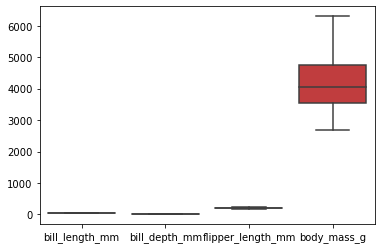

In [4]:
# 결측치 확인
print(df.isnull().sum())

# 이상치 탐지
sns.boxplot(data=df)
plt.show()

In [5]:
# 결측치 제거
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


결측치의 수가 적어 제거해도 무방할 것이라 예상하여 제거하였음

### 수치형 변수 시각화
- Penguin 데이터셋의 수치형 변수들에 대한 히스토그램을 10개의 구간으로 나누어 시각화

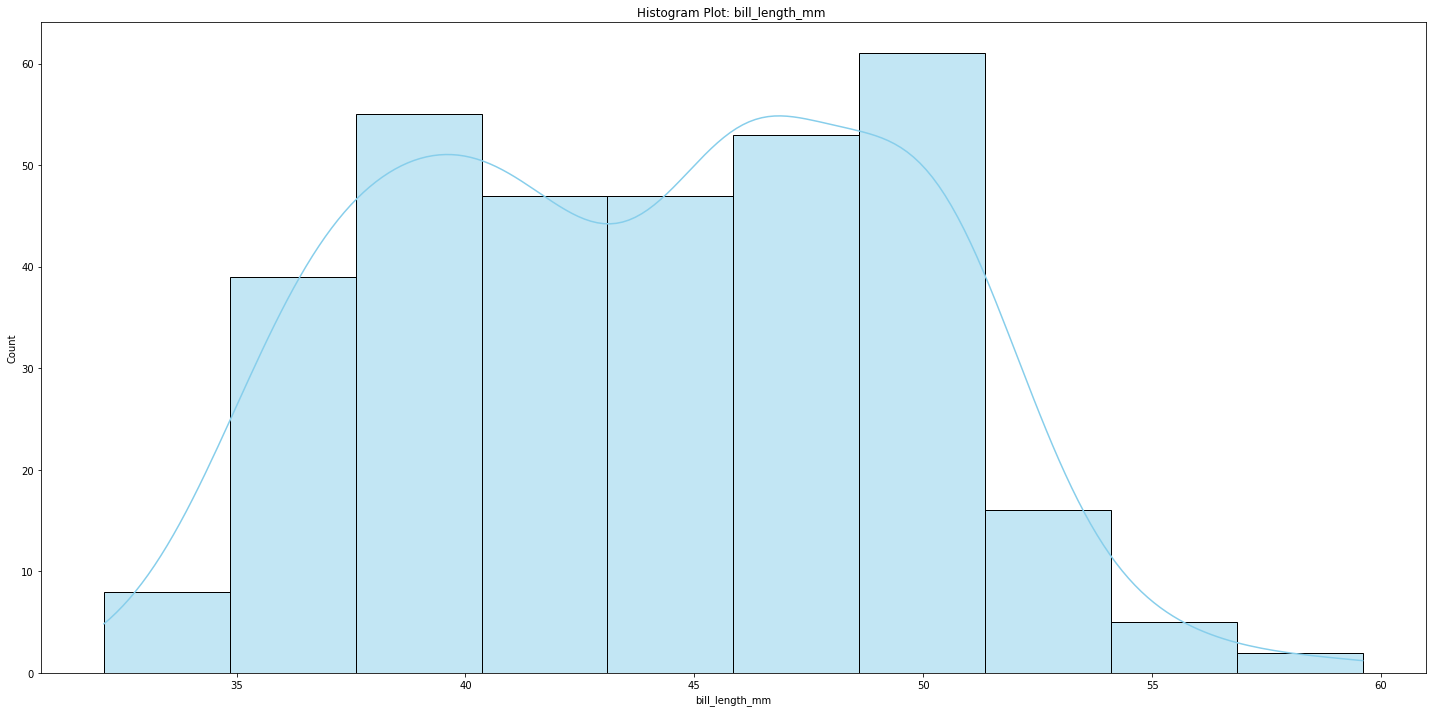

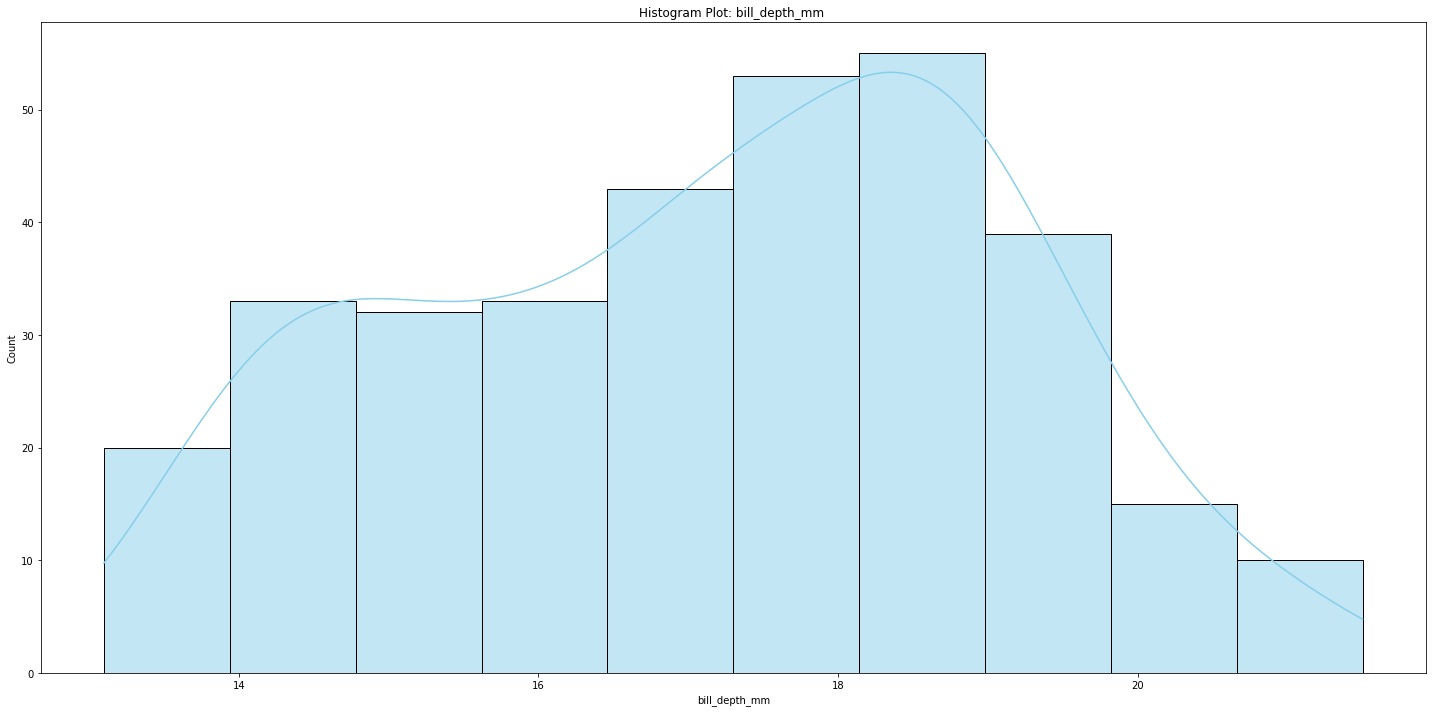

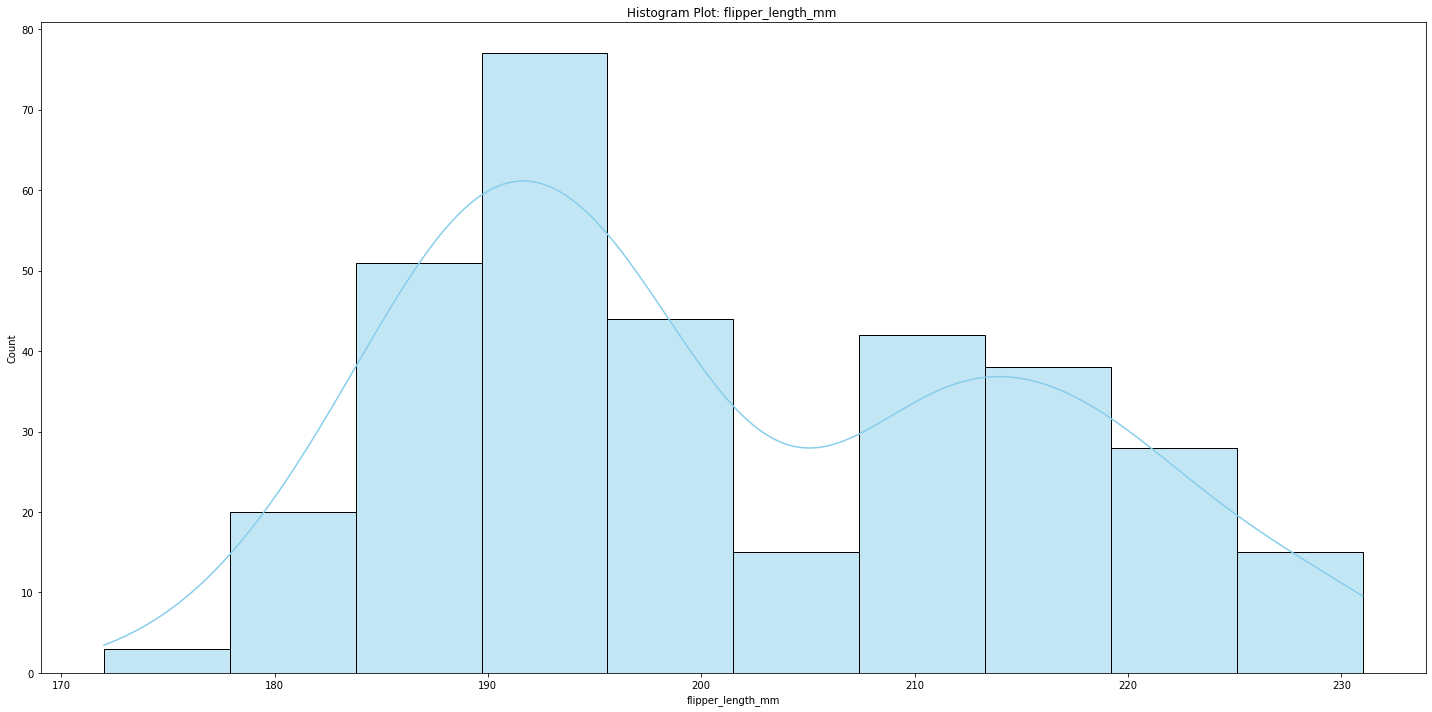

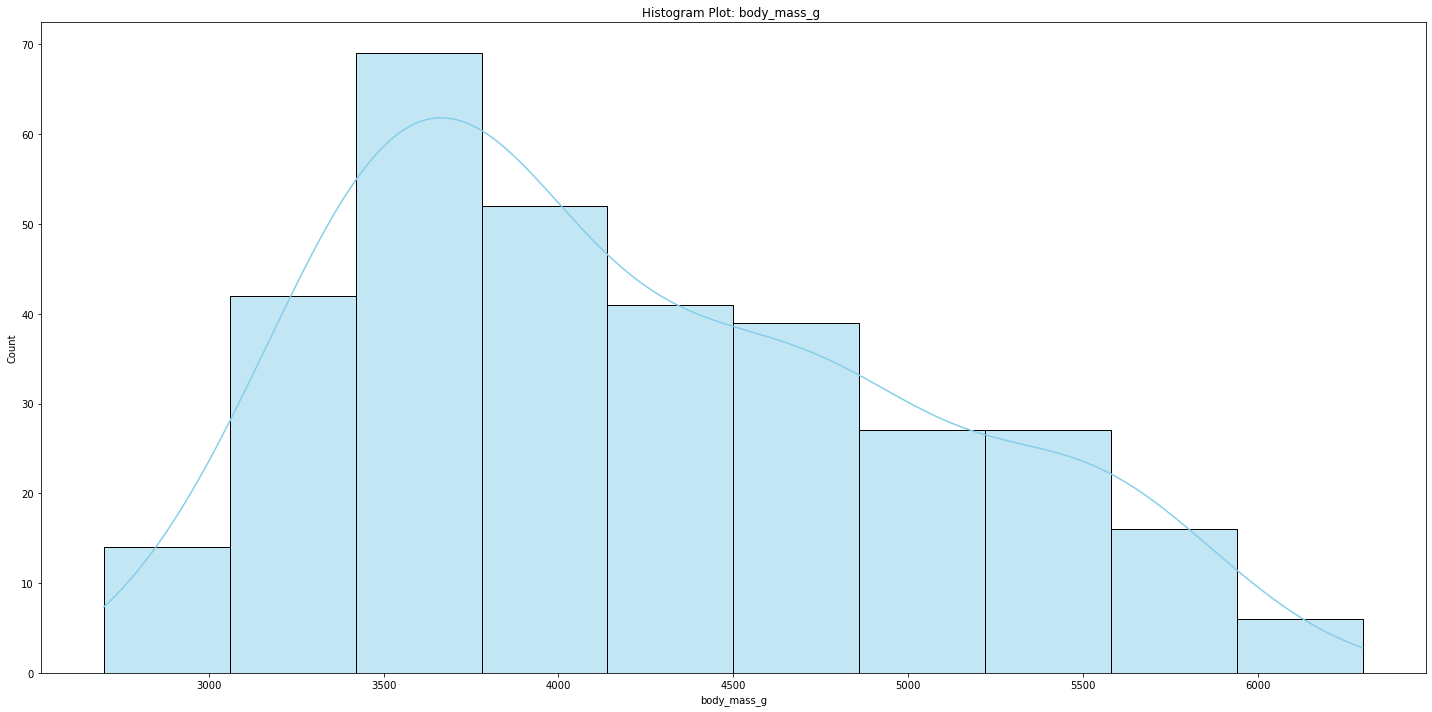

In [6]:
numeric_col=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_col.append(col)

for col in numeric_col:
    plt.figure(figsize=(20, 10))
    sns.histplot(df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram Plot: {col} ')    

    plt.tight_layout()
    plt.show()

# Species로 분류하기

## EDA

### 특성 분포 확인
각 변수를 x축, y축으로 두어 종별 데이터 분포 확인

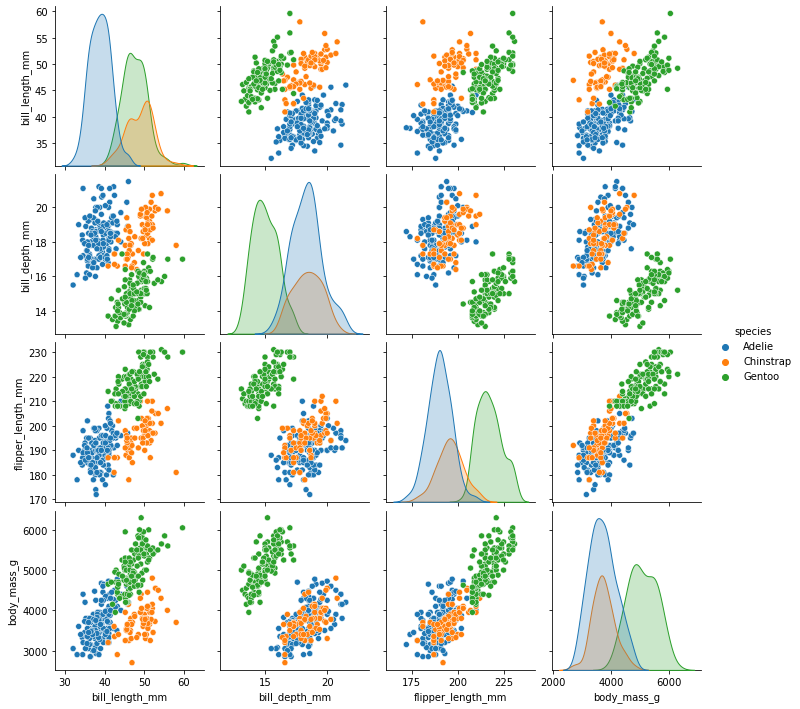

In [7]:
# 특성 분포 확인
sns.pairplot(df, hue='species')
plt.show()

부리의 가로 길이, 세로 길이 중 한 가지가 축이 되었을 때 종별로 가장 잘 나누어졌음

### 목표 변수 분포 확인
- 종별로 데이터 수의 차이를 확인하고자 히스토그램 작성

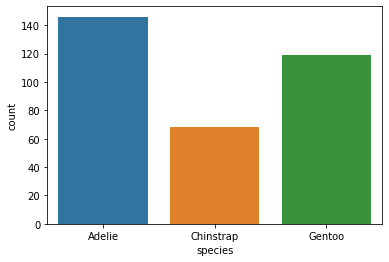

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


In [8]:
# 목표 변수 분포 확인
sns.countplot(data=df, x='species')
plt.show()
print(df['species'].value_counts())

Adelie > Gentoo > Chinstrap 순으로 데이터 수에 차이가 있음을 확인

### 라벨 인코딩
- 카테고리형(오브젝트형)인 경우 인코딩 진행
- 카테고리 수가 많지 않아 인코딩 방식이 크게 영향을 주지 않을 것으로 예상되어 라벨 인코딩을 선택

In [9]:
# 데이터프레임에서 object 형태인 열 선택
object_columns = df.select_dtypes(include=['object']).columns

# 라벨 인코더 생성 및 적용
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


'species', 'island', 'sex' 변수가 인코딩 되었음
Adelie : 0


### 상관 행렬 계산
- 타겟과 상관관계가 높은 변수일 수록 해당 데이터를 잘 설명하는 변수라고 할 수 있음
- 변수 별로 상관 계수를 계산하여 상관 행렬을 시각화

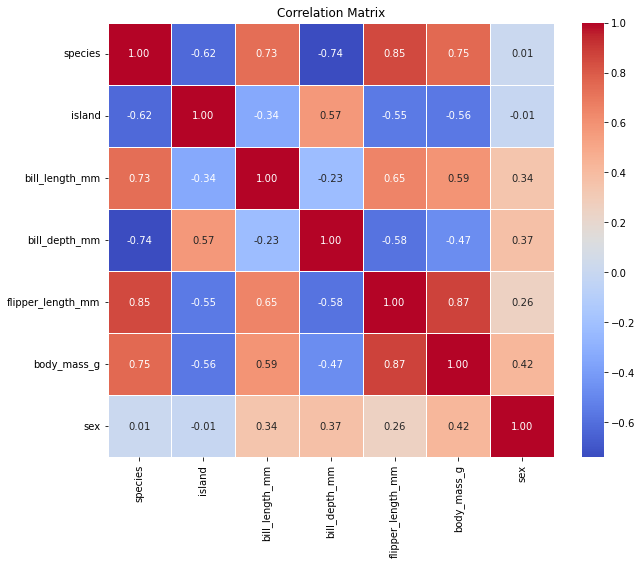

In [10]:
# 상관 행렬 계산
correlation_matrix = df.corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- 날개 길이, 몸무게, 부리의 세로 길이, 부리의 가로 길이 순으로 펭귄 종과 상관관계가 컸음
- 이외에 몸무게와 날개의 길이 간의 상관 관계가 높게 나타남

### 2개의 열 씩 산점도 찍어보기

부리의 가로 길이 & 부리의 세로 길이

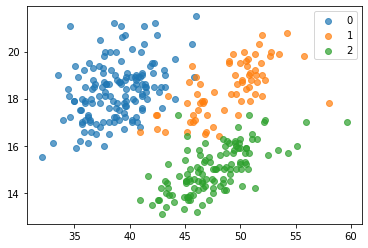

In [11]:
labels = df['species'].unique()
for item in labels:
    plt.scatter(x=df[df['species']==item]['bill_length_mm'], y=df[df['species']==item]['bill_depth_mm'], alpha=0.7) 
plt.legend(labels=labels)

날개 길이 & 몸무게

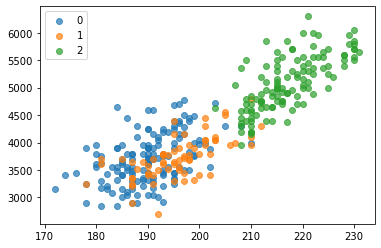

In [12]:
labels = df['species'].unique()
for item in labels:
    plt.scatter(x=df[df['species']==item]['flipper_length_mm'], y=df[df['species']==item]['body_mass_g'], alpha=0.7) 
plt.legend(labels=labels)

날개 길이 & 부리의 가로 길이

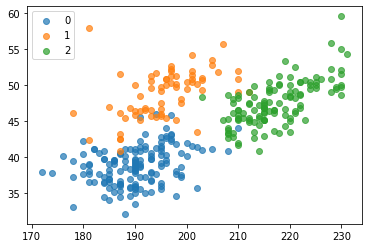

In [13]:
labels = df['species'].unique()
for item in labels:
    plt.scatter(x=df[df['species']==item]['flipper_length_mm'], y=df[df['species']==item]['bill_length_mm'], alpha=0.7) 
plt.legend(labels=labels)

날개 길이 & 부리의 세로 길이

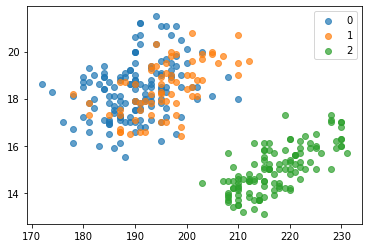

In [14]:
labels = df['species'].unique()
for item in labels:
    plt.scatter(x=df[df['species']==item]['flipper_length_mm'], y=df[df['species']==item]['bill_depth_mm'], alpha=0.7) 
plt.legend(labels=labels)

몸무게 & 부리의 가로 길이

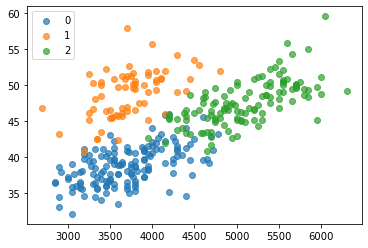

In [15]:
labels = df['species'].unique()
for item in labels:
    plt.scatter(x=df[df['species']==item]['body_mass_g'], y=df[df['species']==item]['bill_length_mm'], alpha=0.7) 
plt.legend(labels=labels)

몸무게 & 부리의 세로 길이

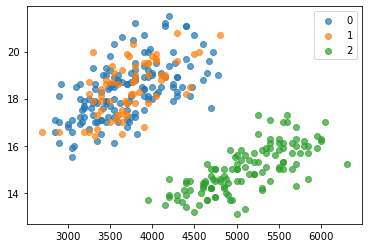

In [16]:
labels = df['species'].unique()
for item in labels:
    plt.scatter(x=df[df['species']==item]['body_mass_g'], y=df[df['species']==item]['bill_depth_mm'], alpha=0.7) 
plt.legend(labels=labels)

### PCA 후 산점도 찍어보기

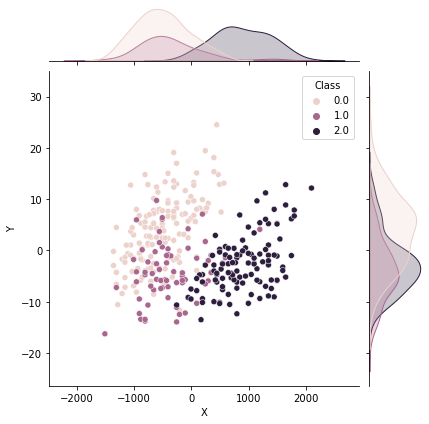

In [17]:
pca = PCA(n_components=2)
dfTemp = pca.fit_transform(df)
dfRes1 = pd.DataFrame(dfTemp, columns=['X', 'Y'])
dfRes1['Class'] = df['species']
dfRes1

def Simple_Scatter(Name):
    G = sns.jointplot(x = 'X', y = 'Y', data = Name, kind='scatter', hue = "Class")
    #G.fig.suptitle("Data : " + Name, fontsize = 10, color = 'black', alpha = 0.9)
    
Simple_Scatter(dfRes1)

## 여러가지 군집화 알고리즘으로 분류해보기

### K-means 군집화

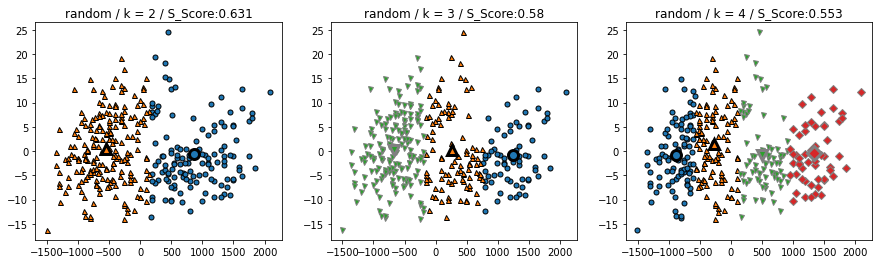

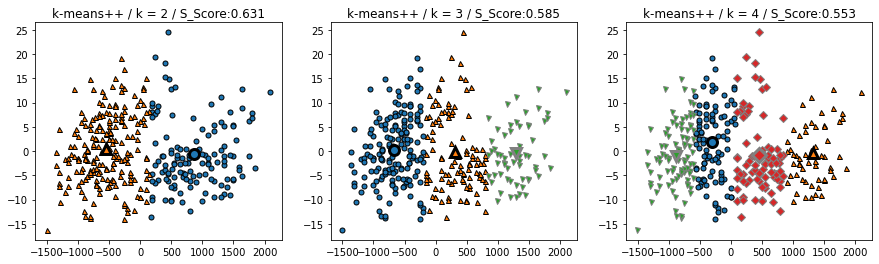

In [18]:
# K-Means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, NAME, Init_Method = 'k-means++', Num_Init=10):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], Kmeans_Clustering.labels_, ax=axes[i - 2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[i - 2], s=10)
        Score = np.round(silhouette_score(Data2, Kmeans_Clustering.labels_),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))
        
k_Means_Plot(Data = dfRes1, Select_k = range(2, 5), NAME = "random", Init_Method='random', Num_Init=10)
k_Means_Plot(Data = dfRes1, Select_k = range(2, 5), NAME = "k-means++", Init_Method='k-means++', Num_Init=10)

### 계층적 군집화

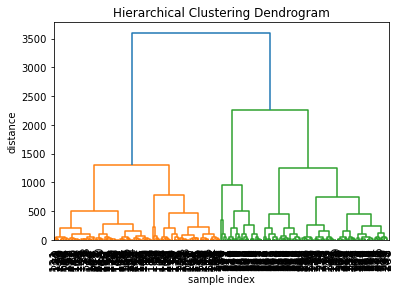

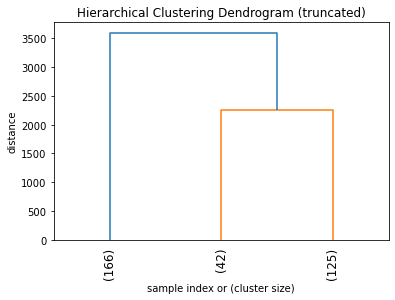

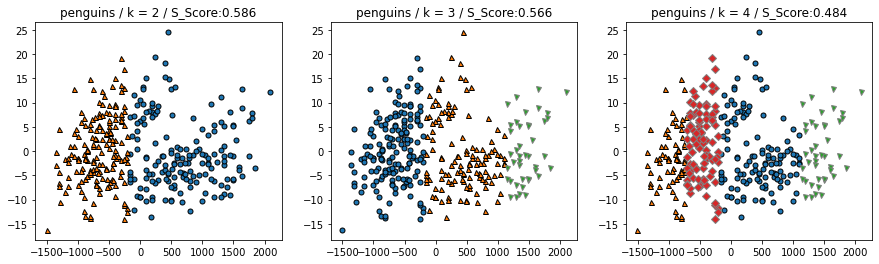

In [19]:
def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )
    plt.show()
    
Fixed_Dendrogram(dfRes1[['X','Y']], -1, True) # -1: nomeaningful value
a = Fixed_Dendrogram(dfRes1[['X','Y']], 3, False)

def Hclust_Plot(Data,Select_k,NAME):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels = H_Clustering.fit_predict(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" + NAME + ' / k = ' + str(i))
        Score=np.round(silhouette_score(Data2,P_Labels),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))
        
Hclust_Plot(dfRes1, range(2, 5), "penguins")

## 의사결정트리로 분류해보기

### 학습, 테스트 데이터 분리하기

In [20]:
seed = 5764

# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']], df['species'], test_size=0.7, random_state = 5674)

### 깊이 제한이 없는 의사결정트리 학습하기

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


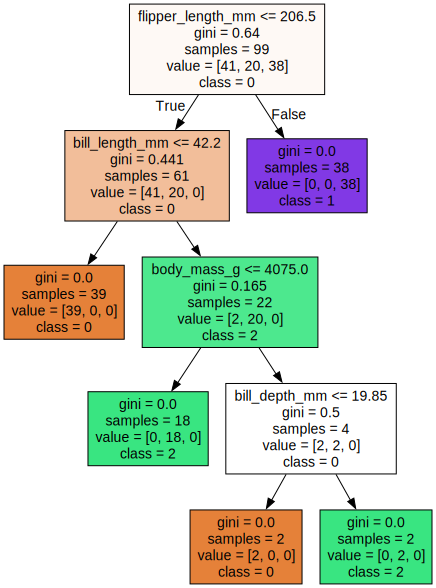

In [21]:
dt_clf = DecisionTreeClassifier(random_state=5674)
dt_clf.fit(x_train, y_train) # 학습

export_graphviz(dt_clf, out_file="tree.dot", class_names=['0', '2', '1'], feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], impurity=True, filled=True)
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')

with open("tree.dot") as f:
    dot_graph = f.read()
dec = graphviz.Source(dot_graph, format='png')
dec

In [22]:
average_val = 'macro'
y_pred = dt_clf.predict(x_test)

# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = average_val)
precision = mt.precision_score(y_test, y_pred, average = average_val)
f1_score = mt.f1_score(y_test, y_pred, average = average_val)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9145299145299145 

Accuracy:  0.91 

Recall:  0.89 

Precision:  0.90 

F1_score:  0.90 

Confusion Matrix: 
 [[97  6  2]
 [ 6 37  5]
 [ 1  0 80]]


### 깊이 제한이 2인 의사결정트리 학습하기

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


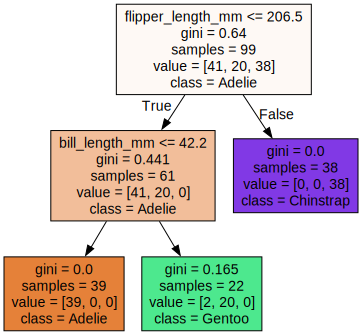

In [23]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=5674) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names=['Adelie', 'Gentoo', 'Chinstrap'], feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], impurity=True, filled=True)

print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
prunedres = graphviz.Source(dot_graph)
prunedres

In [24]:
# 학습결과 평가
print("Train_Accuracy : ", pruned_dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", pruned_dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = average_val)
precision = mt.precision_score(y_test, y_pred, average = average_val)
f1_score = mt.f1_score(y_test, y_pred, average = average_val)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix) 

Train_Accuracy :  0.9797979797979798 

Test_Accuracy :  0.9188034188034188 

Accuracy:  0.91 

Recall:  0.89 

Precision:  0.90 

F1_score:  0.90 

Confusion Matrix: 
 [[97  6  2]
 [ 6 37  5]
 [ 1  0 80]]


# Sex로 분류하기

## EDA

### 특성 분포 확인
각 변수를 x축, y축으로 두어 성별별 데이터 분포 확인

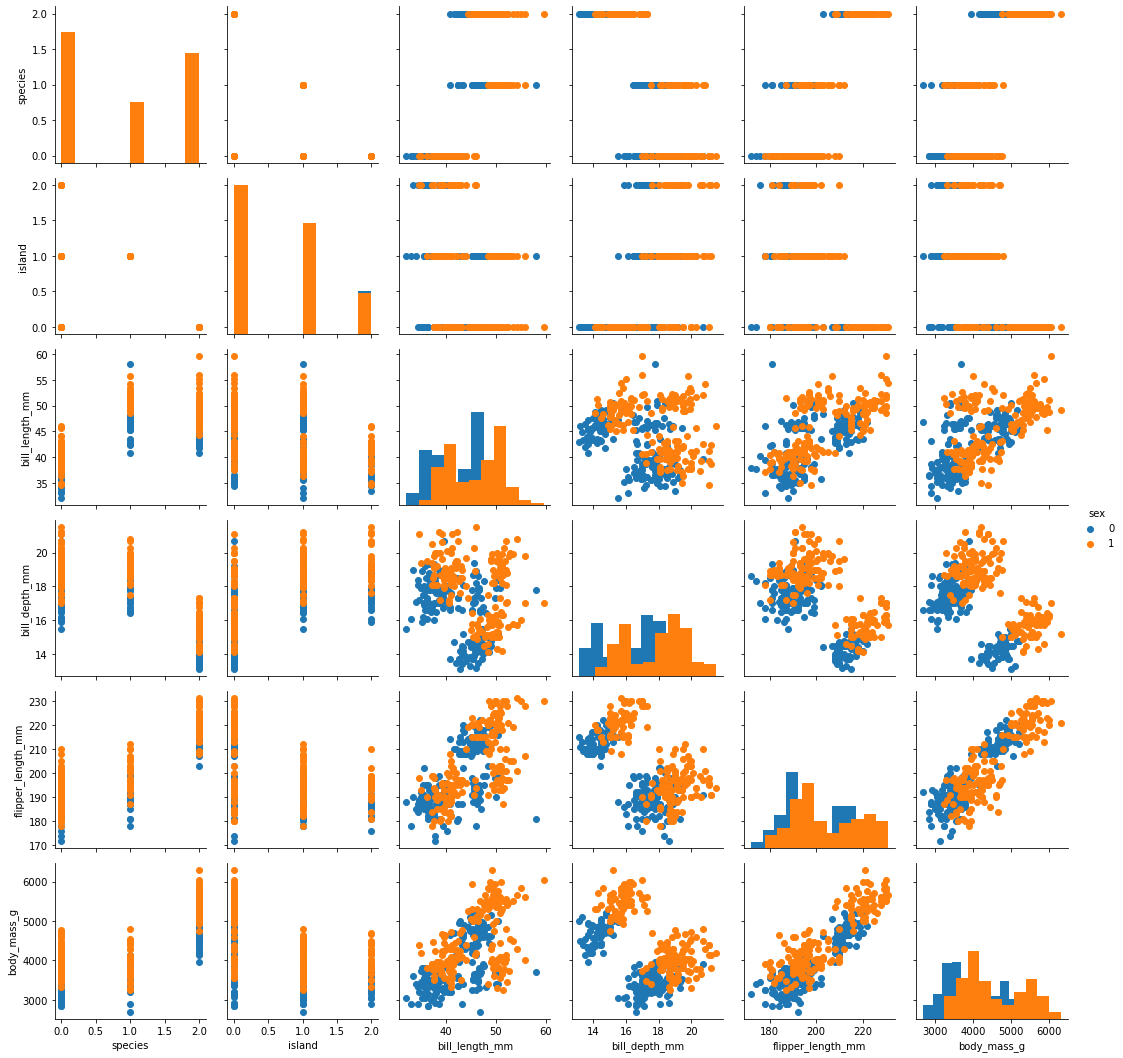

In [25]:
g = sns.PairGrid(df, hue="sex")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

### 목표 변수 분포 확인
- 성별별로 데이터 수의 차이를 확인하고자 히스토그램 작성

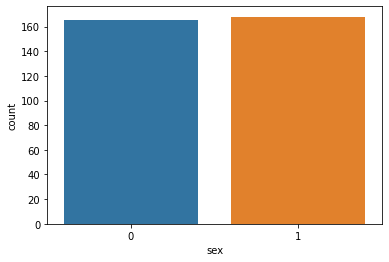

1    168
0    165
Name: sex, dtype: int64


In [26]:
# 목표 변수 분포 확인
sns.countplot(data=df, x='sex')
plt.show()
print(df['sex'].value_counts())

### 데이터 표준화
- 데이터프레임의 모든 열에 대해 StandardScaler를 적용하여 데이터를 표준화

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
new_df = pd.DataFrame(data=X, columns=df.columns)
new_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-1.034374,1.889392,-0.896042,0.780732,-1.426752,-0.568475,0.991031
1,-1.034374,1.889392,-0.822788,0.119584,-1.069474,-0.506286,-1.009050
2,-1.034374,1.889392,-0.676280,0.424729,-0.426373,-1.190361,-1.009050
3,-1.034374,1.889392,-1.335566,1.085877,-0.569284,-0.941606,-1.009050
4,-1.034374,1.889392,-0.859415,1.747026,-0.783651,-0.692852,0.991031
5,-1.034374,1.889392,-0.932669,0.323014,-1.426752,-0.723946,-1.009050
6,-1.034374,1.889392,-0.877728,1.238450,-0.426373,0.582014,0.991031
7,-1.034374,1.889392,-0.529772,0.221299,-1.355296,-1.252549,-1.009050
8,-1.034374,1.889392,-0.987609,2.052171,-0.712196,-0.506286,0.991031
9,-1.034374,1.889392,-1.720150,2.001313,-0.212006,0.239977,0.991031


## 군집화 알고리즘으로 분류하기

### PCA 후 군집 개수 구하기
- PCA를 진행한 후 K-Means 군집화 시 최적의 군집 개수 구하기

2


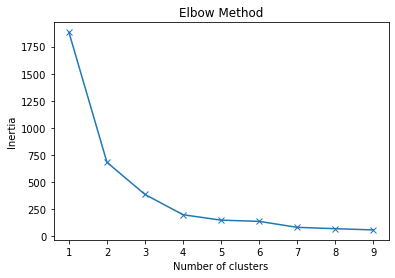

Number of cluster would be 4 


In [28]:
pca = PCA(n_components=None)
df_pca = pca.fit(new_df)
df_pca.explained_variance_ratio_
n_components = sum(df_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
new_df_pca = pca.fit_transform(new_df)
print(n_components)

sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(new_df_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse, marker="x")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

print(f'Number of cluster would be 4 ')

### K-means 군집화 시각화

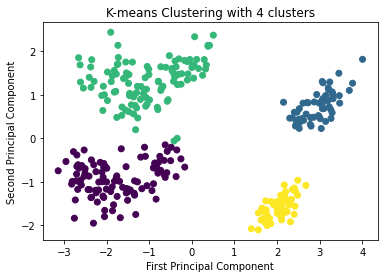

In [29]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(new_df_pca)
plt.scatter(new_df_pca[:, 0], new_df_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering with 4 clusters")
plt.show()